# Bank Marketing (Campaign)
Data Set Information :

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

## Load the dataset 

In [2]:
data = pd.read_csv("bank-additional-full.csv")
print(data.head(5))
print(data.shape)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In the given dataset, which consists of 41188 observations and 21 columns or features.  

In [3]:
print(data.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


## Basic information about dataset
Below are two lines of syntax explaining how the dataset would be in statistics. The first line of code is giving basic information about the dataset i.e., it contains 21 columns, 41188 rows and the datatype of 21 features. There are two types of data in our dataset. They are 10 int and float types and 11 object types. The second line code describes the statistics of these int and float-type features.

In [4]:
#Basic information about dataset
data.info()
#Describe the data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking duplicate and null values
In the dataset, first, we must check duplicate and null values. Our dataset has 12 duplicate values. But we have no null values in the columns. So, we must handle duplicate values.

In [5]:
#Find the duplicates
print(data.duplicated().sum())

#Find null values
print(data.isnull().sum())

12
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
data.replace("unknown", np.nan, inplace=True)

In [7]:
# Drop duplicated 
data.drop_duplicates(inplace=True) 
data.shape

(41176, 21)

If we set 'Unknown' to null, then our dataset having null values. Below, we can see which feature contains null values.

In [8]:
# data.isna().sum()
print(data.isnull().sum())

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [9]:
null_percentage = data.isnull().mean()*100
null_percentage

age                0.000000
job                0.801438
marital            0.194288
education          4.201477
default           20.876239
housing            2.404313
loan               2.404313
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

## Outliers in the dataset

In [10]:
data_1 = data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

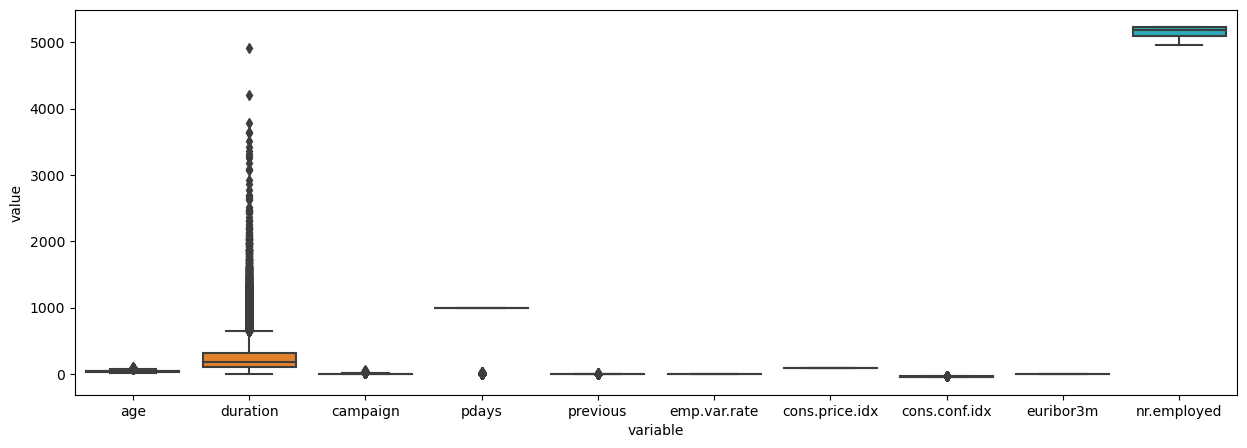

<Figure size 2000x500 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="variable", y="value", data=pd.melt(data_1))
plt.figure(figsize=(20,5))
plt.show()

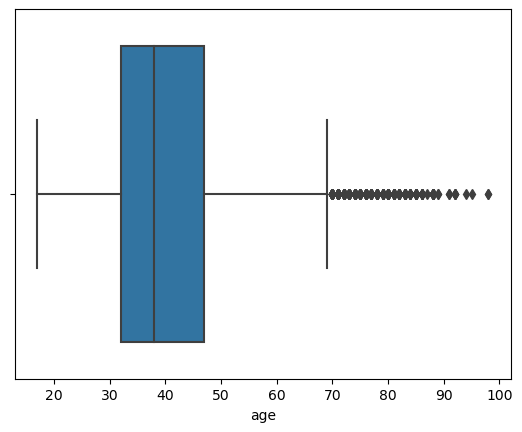

In [12]:
sns.boxplot(x = data_1['age'])
plt.show()

<Axes: xlabel='nr.employed', ylabel='Count'>

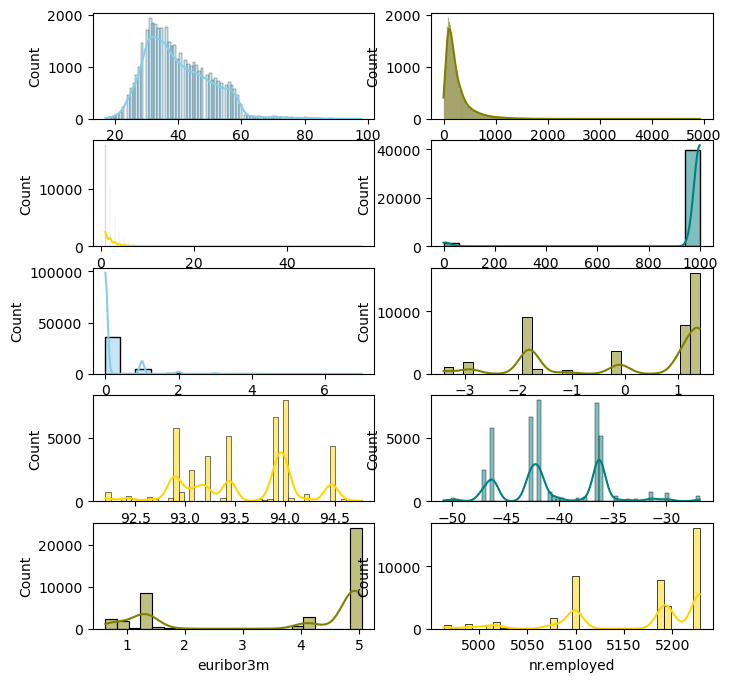

In [13]:
fig, axs = plt.subplots(5, 2, figsize=(8, 8))
sns.histplot(data=data_1, x="age", kde=True, color="skyblue",ax=axs[0, 0])
sns.histplot(data=data_1, x="duration", kde=True, color="olive",ax=axs[0, 1])
sns.histplot(data=data_1, x="campaign", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data_1, x="pdays", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data_1, x="previous", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=data_1, x="emp.var.rate", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=data_1, x="cons.price.idx", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=data_1, x="cons.conf.idx", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=data_1, x="euribor3m", kde=True, color="olive", ax=axs[4, 0])
sns.histplot(data=data_1, x="nr.employed", kde=True, color="gold", ax=axs[4, 1])

C:\Users\thanu\AppData\Local\Temp\ipykernel_20184\1812109749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['age'], bins = 15, kde = True)


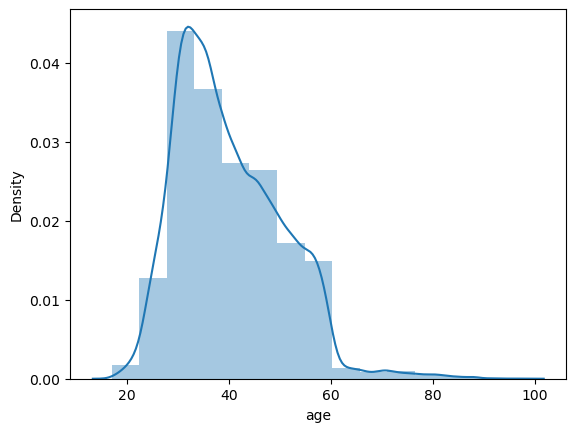

In [14]:
sns.distplot(data_1['age'], bins = 15, kde = True)
plt.show()

## Handling the outliers in the Age column
The interquartile range (IQR) is a statistical measure used to determine the variability in a dataset by subtracting the 25th percentile (Q1) from the 75th percentile (Q3). Outliers are values that fall outside of a certain range, which is typically calculated as Q1–1.5IQR to Q3+1.5IQR.

In [15]:
data_1[['age']].describe()

,age
count,41176.00000
mean,40.02380
std,10.42068
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [16]:
data_1['age'].quantile(0.25)

32.0

In [17]:
data_1['age'].quantile(0.75)

47.0

In [18]:
Q1 = data_1['age'].quantile(0.25)
Q3 = data_1['age'].quantile(0.75)
IQR = Q3-Q1
IQR

15.0

In [19]:
lower_lim = Q1-1.5*IQR
upper_lim = Q1+1.5*IQR
print(lower_lim)
print(upper_lim)

9.5
54.5


In [20]:
outliers_15_low = (data_1['age']<lower_lim)
# print(outliers_15_low)
outliers_15_up = (data_1['age']>upper_lim)
# print(outliers_15_up)

In [21]:
len(data_1['age']) - (len(data_1['age'][outliers_15_low])+len(data_1['age'][outliers_15_up]))

36948

In [22]:
data_1['age'][(outliers_15_low|outliers_15_up)]

0        56
1        57
4        56
6        59
13       57
         ..
41178    62
41179    64
41183    73
41185    56
41187    74
Name: age, Length: 4228, dtype: int64

In [23]:
data_1['age'][~(outliers_15_low|outliers_15_up)]

2        37
3        40
5        45
7        41
8        24
         ..
41180    36
41181    37
41182    29
41184    46
41186    44
Name: age, Length: 36948, dtype: int64

In [24]:
data_1 = data_1[~(outliers_15_low|outliers_15_up)]
data_1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41180,36,254,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41181,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41182,29,112,1,9,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


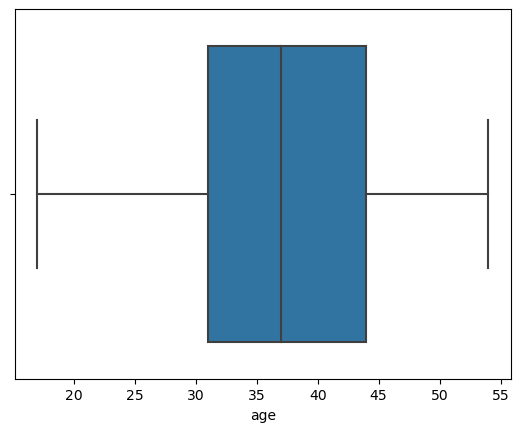

In [25]:
sns.boxplot(x = data_1['age'])
plt.show()

In [26]:
data_1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36948.000000,36948.000000,36948.000000,36948.000000,36948.000000,36948.000000,36948.000000,36948.000000,36948.000000,36948.000000
mean,37.731731,257.568908,2.572832,966.834118,0.163365,0.123122,93.583130,-40.655735,3.664896,5169.511435
std,8.032715,260.017970,2.777584,175.793097,0.476188,1.538778,0.568933,4.503908,1.708683,69.767973
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000
50%,37.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,44.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,54.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Finding skewness
Skewness is a way of estimating and measuring the shape of a distribution. It is a vital statistical method for estimating asymmetrical behavior rather than computing the frequency distribution.

Distribution on the basis of skewness value:

Skewness = 0: Then normally distributed.

Skewness > 0: Then more weight in the left tail of the distribution.

Skewness < 0: Then more weight in the right tail of the distribution.

In [27]:
from scipy.stats import skew
# Calculate Pearson's skewness coefficient
skewness1 = skew(data_1)

# Calculate moment coefficient of skewness
skewness2 = np.mean((data_1 - np.mean(data_1)) ** 3) / (np.std(data_1) ** 3)

print("Pearson's skewness coefficient: ", skewness1)
print("Moment coefficient of skewness:\n", skewness2)

Pearson's skewness coefficient:  [ 0.23795482  3.3107468   4.79008024 -5.28224096  3.90406112 -0.74646063
 -0.19884943  0.27784703 -0.75398964 -1.08125485]
Moment coefficient of skewness:
 age               0.237955
duration          3.310747
campaign          4.790080
pdays            -5.282241
previous          3.904061
emp.var.rate     -0.746461
cons.price.idx   -0.198849
cons.conf.idx     0.277847
euribor3m        -0.753990
nr.employed      -1.081255
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.23795481573790367


Text(0, 0.5, 'Frequency')

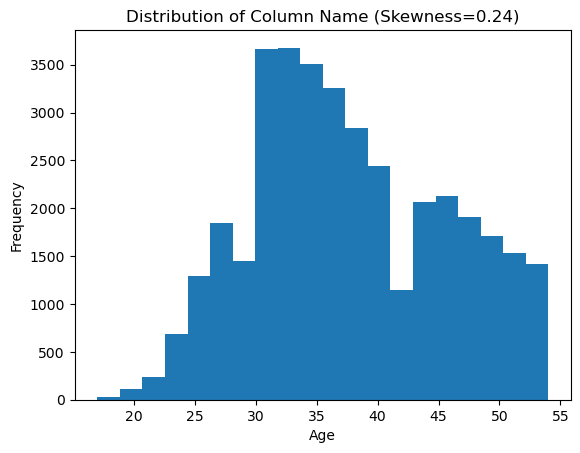

In [28]:
# Calculate skewness
skewness = skew(data_1['age'])
print(skewness)

# Plot histogram
plt.hist(data_1['age'], bins=20)


plt.title('Distribution of Column Name (Skewness={:.2f})'.format(skewness))
plt.xlabel('Age')
plt.ylabel('Frequency')

In [29]:
data_1['age'].fillna(data_1['age'].mean(), inplace=True)

In [30]:
data_1['age'].describe()

count    36948.000000
mean        37.731731
std          8.032715
min         17.000000
25%         31.000000
50%         37.000000
75%         44.000000
max         54.000000
Name: age, dtype: float64

In [31]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36948 entries, 2 to 41186
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36948 non-null  int64  
 1   duration        36948 non-null  int64  
 2   campaign        36948 non-null  int64  
 3   pdays           36948 non-null  int64  
 4   previous        36948 non-null  int64  
 5   emp.var.rate    36948 non-null  float64
 6   cons.price.idx  36948 non-null  float64
 7   cons.conf.idx   36948 non-null  float64
 8   euribor3m       36948 non-null  float64
 9   nr.employed     36948 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [32]:
# data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = data_1[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] 

# Handling missing values in the dataset
Handling missing values is an essential step in data cleaning and preprocessing. There are several methods to handle missing values, and choosing the right method depends on the nature of the data and the missing values.

## Filling missing values using value_counts method
value_counts(): This method is useful when the missing values are represented as NaN. The value_counts() method returns a series containing counts of unique values, excluding NaN values. It can be used to determine the most frequent value in a column and impute the missing values with that value.

This column('marital') has 80 missing values. So, we can use the value_counts method to fill these values.

In [33]:
data['marital'].fillna(data['marital'].value_counts().index[0], inplace = True)

## Fill missing values with forward or backward fill:
Forward or backward fill: This method involves filling missing values with the previous (forward fill) or next (backward fill) known value. This method is useful when dealing with time series data where the missing value is expected to be similar to the previous or next value.

In [34]:
data['housing'] = data['housing'].fillna(method='ffill')
data['default'] = data['default'].fillna(method='bfill')

## Fill missing values with mode:
Mode imputation: The mode is the most frequent value in a column. Mode imputation involves replacing the missing values with the mode of the column. This method is useful when the missing values are few compared to the total number of observations and the mode is a reasonable representation of the missing values.

In [35]:
data['loan'] = data['loan'].fillna(data['loan'].mode().iloc[0])

## Interpolation:
Interpolation: Interpolation is a statistical technique that involves estimating missing values based on the pattern observed in the data. Linear interpolation is commonly used to estimate missing values. This method is useful when dealing with continuous data and the missing values are not frequent.

In [36]:
data['job'] = data['job'].interpolate()

In [37]:
data.isna().sum()

age                  0
job                330
marital              0
education         1730
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [48]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imputer = IterativeImputer()
# data[['default']] = imputer.fit_transform(data[['default']])

In [ ]:
# data['default'].fillna(data['default'].value_counts().index[0], inplace = True)

In [ ]:
# lab1_encoder = preprocessing.LabelEncoder()
# lab2_encoder = preprocessing.LabelEncoder()
# lab3_encoder = preprocessing.LabelEncoder()

# df3['marital'] = lab1_encoder.fit_transform(df3['marital'])
# df3['housing'] = lab2_encoder.fit_transform(df3['housing'])
# df3['age'] = lab3_encoder.fit_transform(df3['age'])